# **Aspect-Based Sentiment Analysis**

---

## **Introduction**

This project focuses on analyzing customer reviews to extract meaningful insights, including sentiment classification and aspect categorization.  
We aim to identify patterns, key phrases, and categories that influence customer sentiment, leveraging natural language processing (NLP) techniques.

**Author**: Muhammad Rizky Raihan  
**Dataset Description**: This dataset contains customer reviews collected from Biro Administrasi Akademik Universitas Muhammadiyah Surakarta.  
The dataset includes:
- Original text in Bahasa Indonesia
- English-translated text
- Preprocessed clean text

---

## **Objective**

1. Classify reviews into positive, neutral, or negative sentiments.  
2. Extract aspects and associate them with corresponding sentiments.  
3. Group extracted aspects into categories such as service, technology, etc.

---

## **Libraries and Dependencies**

Below are the libraries used in this analysis:

- `pandas`: For data manipulation and analysis.  
- `numpy`: For numerical computations.  
- `matplotlib` and `seaborn`: For visualizations.  
- `nltk` and `spaCy`: For natural language processing tasks.  
- `sklearn`: For machine learning models and metrics.  
- `transformers`: For leveraging pre-trained language models like BERT.  
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from transformers import pipeline

# Load the spacy language model
nlp = spacy.load("en_core_web_trf")

C:\Users\Raihan\anaconda3\Lib\site-packages\thinc\shims\pytorch.py:261: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(filelike, map_location

## **Step 1: Dataset Loading and Initial Overview**

We begin by loading the dataset and examining its structure. This initial step helps to:
1. Understand the dimensions of the dataset (\( m \times n \)), where \( m \) is the number of records and \( n \) is the number of features.
2. Check for missing or inconsistent values.

### Statistical Definitions:
Let \( N \) represent the total number of records. Basic dataset properties include:
- Shape (\( m \times n \)).

- Summary statistics for text lengths.

Key metrics:
$$
\text{Mean} (\mu) = \frac{1}{N} \sum_{i=1}^N L_i
$$
$$
\text{Variance} (\sigma^2) = \frac{1}{N} \sum_{i=1}^N (L_i - \mu)^2
$$
Where \( L_i \) is the length of the \( i^{th} \) review.
---


In [2]:
# Step 1: Load and Explore the Dataset
file_path = 'labeled_text_with_sentiment.csv'
data = pd.read_csv(file_path)

# Basic Dataset Information
print("Dataset Overview:")
print(data.info())

# Display a Sample of the Dataset
print("\nSample Data:")
display(data.head())

# Compute text lengths
data['text_length'] = data['clean_text'].apply(len)
print("\nText Length Statistics:")
print(data['text_length'].describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Kritik dan saran  1115 non-null   object
 1   translated        1115 non-null   object
 2   clean_text        1115 non-null   object
dtypes: object(3)
memory usage: 26.3+ KB
None

Sample Data:


,Kritik dan saran,translated,clean_text
0,Pelayanan yang dilakukan petugas BAA kepada ma...,The service provided by BAA officers to studen...,the service provided by baa officers to studen...
1,Assalamu'alaikum..\nmohon maaf sebelumnya kepa...,Assalamu'alaikum..\napologize in advance to th...,assalamu'alaikum..\napologize in advance to th...
2,Proses mengurus berkas/administrasi akademik b...,The process for managing academic files/admini...,the process for managing academic files/admini...
3,Saya ke BAA utk mengurus matkul yg blm keluar ...,I went to BAA to take care of the subjects tha...,i went to baa to take care of the subjects tha...
4,"Kadang masuk BAA bingung, harus ngurus ini kem...","Sometimes when we enter BAA we are confused, w...","sometimes when we enter baa we are confused, w..."



Text Length Statistics:
count    1115.000000
mean      228.390135
std       145.480629
min         6.000000
25%       147.000000
50%       183.000000
75%       260.000000
max      1760.000000
Name: text_length, dtype: float64


---

## **Step 2: Exploratory Data Analysis (EDA)**

Understanding the distribution of text lengths and identifying potential outliers are crucial for effective preprocessing.

---

### Objective:
1. Explore the distribution of text lengths.
2. Identify anomalies or patterns in the dataset.

### Mathematical Definitions:
Given $N$ reviews, let $L_i$ represent the text length of the $i^{th}$ review.
Key metrics include:
$$\mu = \frac{1}{N} \sum_{i=1}^N L_i$$

$$\sigma^2 = \frac{1}{N} \sum_{i=1}^N (L_i - \mu)^2$$

---


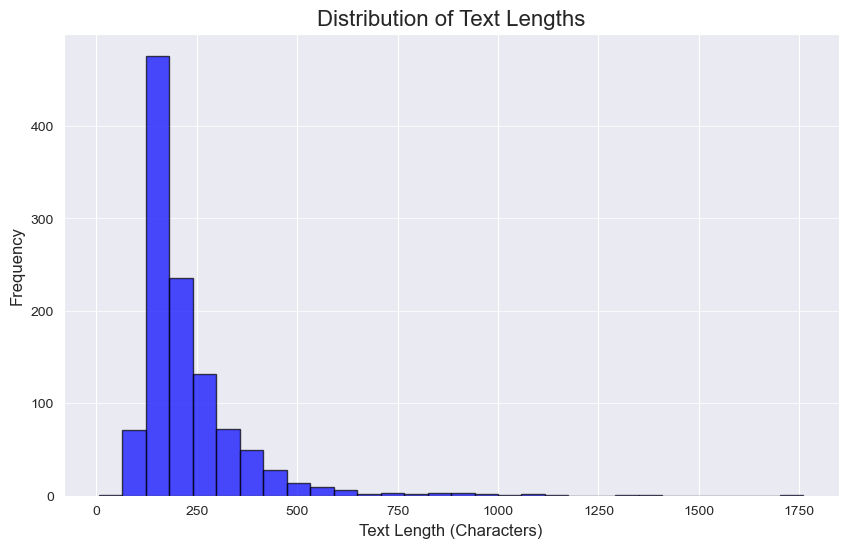

Mean Text Length (\mu): 228.39
Text Length Variance (\sigma^2): 21164.61
Minimum Text Length: 6
Maximum Text Length: 1760


In [3]:
# Step 2: Text Length Analysis
plt.figure(figsize=(10, 6))
plt.hist(data['text_length'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Compute statistical metrics
mean_length = data['text_length'].mean()
variance_length = data['text_length'].var()
min_length = data['text_length'].min()
max_length = data['text_length'].max()

# Print computed metrics
print(f"Mean Text Length (\\mu): {mean_length:.2f}")
print(f"Text Length Variance (\\sigma^2): {variance_length:.2f}")
print(f"Minimum Text Length: {min_length}")
print(f"Maximum Text Length: {max_length}")


---

## **Observations and Insights**
- From the histogram, the text lengths are distributed with most reviews clustered around the mean ($\mu$).
- Variance ($\sigma^2$) indicates moderate variability, but extreme values ($L_i > 1000$) suggest potential outliers.

---


## **Step 3: Preprocessing the Text Data**

Preprocessing ensures the dataset is clean and ready for analysis. It involves the following steps:
1. **Tokenization**: Breaking text into individual words or tokens.
2. **Stopword Removal**: Eliminating non-informative words like "the," "is," "and."
3. **Lemmatization**: Reducing words to their base or root form (e.g., "running" to "run").

### Mathematical Notation:
Given a text $ T = \{w_1, w_2, \ldots, w_n\} $, where $ w_i $ represents the $ i^{th} $ word:
- Tokenization results in $ T = \{w_1, w_2, \ldots, w_n\} $.
- Stopword removal produces $ T' \subseteq T $, where $ w_i \notin \text{Stopwords} $.
- Lemmatization maps each word $ w_i \rightarrow \text{Lemma}(w_i) $.

---


In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the clean_text column
data['processed_text'] = data['clean_text'].apply(preprocess_text)

# Display sample of processed data
print(data[['clean_text', 'processed_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raihan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raihan\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raihan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Raihan\AppData\Roaming\nltk_data...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Raihan/nltk_data'
    - 'C:\\Users\\Raihan\\anaconda3\\nltk_data'
    - 'C:\\Users\\Raihan\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Raihan\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Raihan\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
